In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [3]:
#loading the dataset to pandas dataframe
gold_data = pd.read_csv('gld_price_data.csv')

In [4]:
#getting some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [5]:
#Statistical measure of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [6]:
correlation = gold_data.corr()

/var/folders/rc/j294rj094lb9j6zz6fcghj7m0000gn/T/ipykernel_1663/1828644926.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

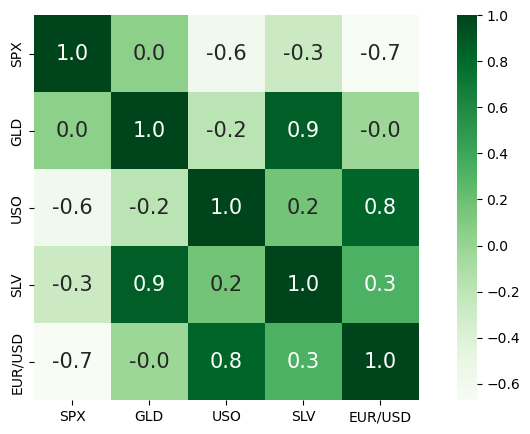

In [7]:
plt.figure(figsize=(10,5))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [8]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [9]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [12]:
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu')) # input layer
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))                               # hidden layer
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))                               # hidden layer
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))                              # output layer


In [13]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [14]:
model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/100
58/58 [==============================] - 0s 3ms/step - loss: 9142.3994 - val_loss: 2916.4087
Epoch 2/100
58/58 [==============================] - 0s 2ms/step - loss: 3279.2063 - val_loss: 2843.0088
Epoch 3/100
58/58 [==============================] - 0s 1ms/step - loss: 2952.2546 - val_loss: 2917.2273
Epoch 4/100
58/58 [==============================] - 0s 1ms/step - loss: 2914.3667 - val_loss: 3005.0383
Epoch 5/100
58/58 [==============================] - 0s 1ms/step - loss: 2686.4863 - val_loss: 2605.3481
Epoch 6/100
58/58 [==============================] - 0s 1ms/step - loss: 2601.5415 - val_loss: 3060.1775
Epoch 7/100
58/58 [==============================] - 0s 1ms/step - loss: 2597.3523 - val_loss: 2620.8518
Epoch 8/100
58/58 [==============================] - 0s 1ms/step - loss: 2363.8567 - val_loss: 2153.8354
Epoch 9/100
58/58 [==============================] - 0s 1ms/step - loss: 2258.9673 - val_loss: 2160.6133
Epoch 10/100
58/58 [==============================] - 0

In [15]:
# Model evaluation
test_data_prediction = model.predict(X_test)

15/15 [==============================] - 0s 701us/step


In [16]:
# Calculate the R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.18914108060179446


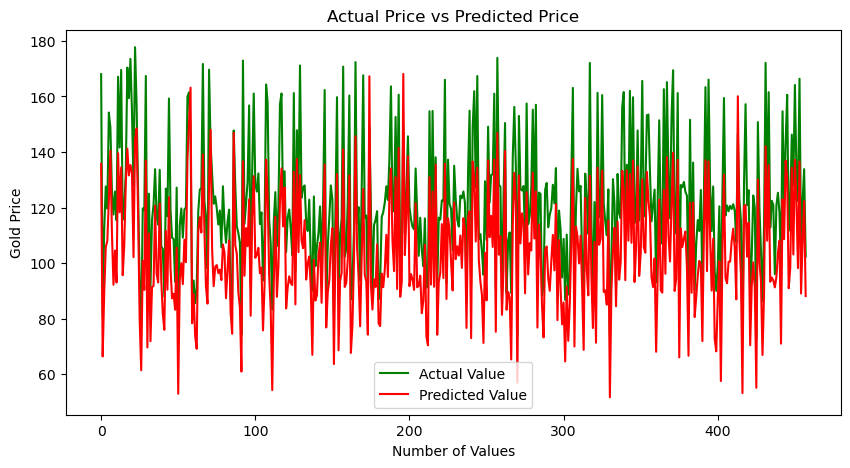

In [17]:
# Compare the actual values and predicted values through visualization

Y_test_list = list(Y_test)
plt.figure(figsize=(10,5))
plt.plot(Y_test_list, color='green', label='Actual Value')
plt.plot(test_data_prediction, color='red', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of Values')
plt.ylabel('Gold Price')
plt.legend()
plt.show()
